## XN_Project_ALY6080 - GROUP-5

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
XN_dataset = pd.read_excel('CourseWiseSkills.xlsx',sheet_name='Course_Skills')
XN_dataset_studentlearning = pd.read_excel('StudentLearningOutcome.xlsx')
XN_dataset.head()

,Program,Course Code,Title,Description,Skill Labels -->,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,23,LDR 6100,Developing Your Leadership Capability,Begins with the premise everyone is capable of...,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,Leadership,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,CMN 6000,Intro to Org Communication,Considers writing and other forms of communica...,Interpersonal Communications,Communications,Editing,Verbal Communication Skills,Change Management,Crisis Communications,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,CMN 6015,Introduction to Digital Era,"Introduces social media concepts, including th...",Leadership,Business To Business,Organizational Leadership,Social Media,Social Media Marketing,Economics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,LDR 6101,Professional Leadership Lab/Core LDR Experience,Offers each student an opportunity to particip...,Communications,Experiential Learning,Simulations,Leadership,Prototyping,Neuroscience,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,LDR 6110,Leading Teams,Offers students an opportunity to lead teams t...,Problem Solving,Team Leadership,Communications,Team Management,Experiential Learning,Empathy,...,Critical Thinking,Situational Leadership Theory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
XN_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Program           45 non-null     int64 
 1   Course Code       45 non-null     object
 2   Title             45 non-null     object
 3   Description       45 non-null     object
 4   Skill Labels -->  45 non-null     object
 5   Unnamed: 5        45 non-null     object
 6   Unnamed: 6        45 non-null     object
 7   Unnamed: 7        45 non-null     object
 8   Unnamed: 8        45 non-null     object
 9   Unnamed: 9        45 non-null     object
 10  Unnamed: 10       45 non-null     object
 11  Unnamed: 11       44 non-null     object
 12  Unnamed: 12       41 non-null     object
 13  Unnamed: 13       40 non-null     object
 14  Unnamed: 14       38 non-null     object
 15  Unnamed: 15       36 non-null     object
 16  Unnamed: 16       35 non-null     object
 17  Unnamed: 17       

In [4]:
XN_dataset.describe()

,Program
count,45.000000
mean,2.800000
std,4.736704
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,23.000000


In [5]:
XN_dataset.iloc[:,0:4].isnull().sum()

Program        0
Course Code    0
Title          0
Description    0
dtype: int64

In [6]:
XN_dataset['Course Code'].value_counts

<bound method IndexOpsMixin.value_counts of 0      LDR 6100
1      CMN 6000
2      CMN 6015
3      LDR 6101
4      LDR 6110
5      LDR 6115
6     LDR 6120 
7      LDR 6135
8      LDR 6140
9      LDR 6145
10     LDR 6150
11     LDR 6405
12     LDR 6410
13     LDR 6430
14     LDR 6441
15     LDR 6443
16     LDR 6470
17     LDR 6961
18     LDR 6980
19     LDR 7980
20     PJM 5900
21     PJM 6000
22     PJM 6005
23     PJM 6015
24     PJM 6025
25     PJM 6075
26     PJM 6125
27     PJM 6135
28     PJM 6140
29     PJM 6145
30     PJM 6175
31     PJM 6180
32     PJM 6205
33     PJM 6210
34     PJM 6215
35     PJM 6610
36     PJM 6630
37     PJM 6640
38     PJM 6710
39     PJM 6810
40     PJM 6620
41     PJM 6820
42     PJM 6825
43     PJM 6910
44     PJM 6983
Name: Course Code, dtype: object>

In [7]:
XN_dataset=XN_dataset.rename(columns={"Course Code": "Course_Code","Program ": "Program"})
XN_dataset.head(10)

,Program,Course_Code,Title,Description,Skill Labels -->,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,23,LDR 6100,Developing Your Leadership Capability,Begins with the premise everyone is capable of...,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,Leadership,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,CMN 6000,Intro to Org Communication,Considers writing and other forms of communica...,Interpersonal Communications,Communications,Editing,Verbal Communication Skills,Change Management,Crisis Communications,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,CMN 6015,Introduction to Digital Era,"Introduces social media concepts, including th...",Leadership,Business To Business,Organizational Leadership,Social Media,Social Media Marketing,Economics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,LDR 6101,Professional Leadership Lab/Core LDR Experience,Offers each student an opportunity to particip...,Communications,Experiential Learning,Simulations,Leadership,Prototyping,Neuroscience,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,LDR 6110,Leading Teams,Offers students an opportunity to lead teams t...,Problem Solving,Team Leadership,Communications,Team Management,Experiential Learning,Empathy,...,Critical Thinking,Situational Leadership Theory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,LDR 6115,Leadership Communication,Offers students an opportunity to evaluate and...,Listening Skills,Eye Contact,Interpersonal Communications,Communications,Emotional Intelligence,Crisis Communications,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,LDR 6120,Developing Organizational Leadership,Offers students an opportunity to learn the be...,Onboarding,Experiential Learning,Teamwork,Leadership,Organizational Leadership,Organizational Structure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23,LDR 6135,Ethical Leadership,Considers leadership dilemmas that can arise w...,Problem Solving,Business Ethics,Corporate Social Responsibility,Decision Making,Organizational Ethics,Leadership,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,LDR 6140,Strategy Development and Implementation,Offers students an opportunity to build strate...,Market Research,Balanced Scorecard,Reliability,Change Management,Decision Making,Strategy Execution,...,Strategic Leadership,PEST Analysis,Value Creation,Critical Thinking,Triple Bottom Line (TBL),Diversification (Investing),Localization,Innovation,Business Strategies,Management Control Systems
9,2,LDR 6145,Global Leadership,Explores changing demographics as they impact ...,Global Leadership,Leadership,Business Model,Demography,Multidisciplinary Approach,Leadership Styles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
values_columns = XN_dataset[['Skill Labels -->',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40','Unnamed: 41']].values.ravel()
values_columns_distinct =  pd.unique(values_columns)
len(values_columns_distinct)

408

In [10]:
XN_wide= XN_dataset[['Course_Code','Skill Labels -->',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40','Unnamed: 41']]


In [11]:
melt1=XN_wide.melt(id_vars=['Course_Code'], value_name='Skills')
melt1

,Course_Code,variable,Skills
0,LDR 6100,Skill Labels -->,Team Leadership
1,CMN 6000,Skill Labels -->,Interpersonal Communications
2,CMN 6015,Skill Labels -->,Leadership
3,LDR 6101,Skill Labels -->,Communications
4,LDR 6110,Skill Labels -->,Problem Solving
...,...,...,...
1705,PJM 6620,Unnamed: 41,NaN
1706,PJM 6820,Unnamed: 41,NaN
1707,PJM 6825,Unnamed: 41,NaN
1708,PJM 6910,Unnamed: 41,NaN


In [12]:
melt1['Skills'].dropna(inplace=True)


In [13]:
melt1.drop('variable',inplace=True,axis=1)

In [14]:
melt1.dropna(inplace=True)

In [15]:
melt1.sort_values(by=['Course_Code'],ascending=True,inplace=True)
melt1.to_excel('C:/Users/Chirag/Dropbox/My PC (CHIGZZ-LAPTOP)/Desktop/newdf_XN.xlsx')

In [16]:
values_columns_distinct

array(['Team Leadership', 'Communications', 'Global Leadership',
       'Emotional Intelligence', 'Servant Leadership', 'Leadership',
       'Journals', 'Transformational Leadership', 'Presentations',
       'Leadership Analysis', 'Research', 'Leadership Styles',
       'Storytelling', 'Psychodynamics', 'Management',
       'Leadership Studies', 'Electronic Portfolio',
       'Motivational Leadership', 'Addressing Ethical Concerns',
       'Diversity Awareness', 'Situational Leadership Theory',
       'Ethical Leadership', nan, 'Interpersonal Communications',
       'Editing', 'Verbal Communication Skills', 'Change Management',
       'Crisis Communications', 'Writing', 'Nonverbal Communications',
       'Grammar', 'American Psychological Style (APA)',
       'Communications Management', 'Business Writing',
       'Professional Communication', 'Group Dynamics', 'Public Speaking',
       'Organizational Communications', 'Intercultural Communication',
       'Graphic Communication', 'Cri

In [18]:
course_skills = pd.DataFrame(index = np.arange(0,45),columns = values_columns_distinct)

### Data Reshaping by Binary Encoding

In [19]:
skill_set = XN_dataset.iloc[:,4:]
skills_set_list = skill_set.iloc[0].tolist()
for i in range(1,45):
    new_skills = skill_set.iloc[i].tolist();
    for skill in new_skills:
        if skill not in skills_set_list:
            skills_set_list.append(skill);
        else:
            continue;
skills_set_list = [skill for skill in skills_set_list if str(skill)!='nan']
len(skills_set_list)

407

In [20]:
#Binary Encoding
for i in range(0,45):
    new_skills = skill_set.iloc[i].tolist();
    new_skills = [skill for skill in new_skills if str(skill)!='nan'];
    for skill in new_skills:
        course_skills.loc[course_skills.index[i],skill]=1;
course_skills = course_skills.replace(np.nan,0);
course_skills

,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,Leadership,Journals,Transformational Leadership,Presentations,Leadership Analysis,...,Business Alignment,Agile Leadership,Kanban Principles,New Product Development,Product Management,Lean Product Development,User Experience Design (UX),Value Proposition,DevOps,Change Request
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
drop_old_col = XN_dataset.drop(['Skill Labels -->',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41'],axis=1)

In [22]:
XN_dataset = pd.merge(drop_old_col,course_skills,on=drop_old_col.index)


In [23]:
XN_dataset.shape
XN_dataset.head()

,key_0,Program,Course_Code,Title,Description,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,...,Business Alignment,Agile Leadership,Kanban Principles,New Product Development,Product Management,Lean Product Development,User Experience Design (UX),Value Proposition,DevOps,Change Request
0,0,23,LDR 6100,Developing Your Leadership Capability,Begins with the premise everyone is capable of...,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,12,CMN 6000,Intro to Org Communication,Considers writing and other forms of communica...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,CMN 6015,Introduction to Digital Era,"Introduces social media concepts, including th...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,LDR 6101,Professional Leadership Lab/Core LDR Experience,Offers each student an opportunity to particip...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,LDR 6110,Leading Teams,Offers students an opportunity to lead teams t...,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
XN_dataset.drop(['key_0'],axis=1,inplace=True)
XN_dataset.head(10)

,Program,Course_Code,Title,Description,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,Leadership,...,Business Alignment,Agile Leadership,Kanban Principles,New Product Development,Product Management,Lean Product Development,User Experience Design (UX),Value Proposition,DevOps,Change Request
0,23,LDR 6100,Developing Your Leadership Capability,Begins with the premise everyone is capable of...,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,12,CMN 6000,Intro to Org Communication,Considers writing and other forms of communica...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,CMN 6015,Introduction to Digital Era,"Introduces social media concepts, including th...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,LDR 6101,Professional Leadership Lab/Core LDR Experience,Offers each student an opportunity to particip...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,LDR 6110,Leading Teams,Offers students an opportunity to lead teams t...,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2,LDR 6115,Leadership Communication,Offers students an opportunity to evaluate and...,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2,LDR 6120,Developing Organizational Leadership,Offers students an opportunity to learn the be...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,23,LDR 6135,Ethical Leadership,Considers leadership dilemmas that can arise w...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,2,LDR 6140,Strategy Development and Implementation,Offers students an opportunity to build strate...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2,LDR 6145,Global Leadership,Explores changing demographics as they impact ...,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
skills_sum_per_row = course_skills.sum(axis=1)
skills_sum_per_row
XN_dataset['skills_sum']= skills_sum_per_row
XN_dataset

,Program,Course_Code,Title,Description,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,Leadership,...,Agile Leadership,Kanban Principles,New Product Development,Product Management,Lean Product Development,User Experience Design (UX),Value Proposition,DevOps,Change Request,skills_sum
0,23,LDR 6100,Developing Your Leadership Capability,Begins with the premise everyone is capable of...,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,22
1,12,CMN 6000,Intro to Org Communication,Considers writing and other forms of communica...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2,3,CMN 6015,Introduction to Digital Era,"Introduces social media concepts, including th...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,18
3,2,LDR 6101,Professional Leadership Lab/Core LDR Experience,Offers each student an opportunity to particip...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
4,2,LDR 6110,Leading Teams,Offers students an opportunity to lead teams t...,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,30
5,2,LDR 6115,Leadership Communication,Offers students an opportunity to evaluate and...,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,27
6,2,LDR 6120,Developing Organizational Leadership,Offers students an opportunity to learn the be...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,17
7,23,LDR 6135,Ethical Leadership,Considers leadership dilemmas that can arise w...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,20
8,2,LDR 6140,Strategy Development and Implementation,Offers students an opportunity to build strate...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,38
9,2,LDR 6145,Global Leadership,Explores changing demographics as they impact ...,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,8


In [26]:
text= XN_dataset_studentlearning['Associated Competency']
text.to_string()

'0                                            Innovation\n1                                         Communication\n2                           Strategic Thinking & Acting\n3                                   Development of Self\n4                                 Development of Others\n5                  Ethical Practices & Civic Mindedness\n6                         Cross-Cultural/Global Mindset\n7     Strategic Thinking, Planning, Action & Impleme...\n8                                        Communication \n9     Sports Knowledge Area-Sports and Society, Law,...\n10                      Civic Mindedness/Global Mindset\n11              Leadership Development of Self & Others\n12                                    Ethical Practices\n13    Scope Management Time Management Cost Manageme...\n14    Leading & Managing Cognitive Abilities Persona...\n15    Scope Management Time Management  Cost Managem...\n16                Personal & Professional Effectiveness'

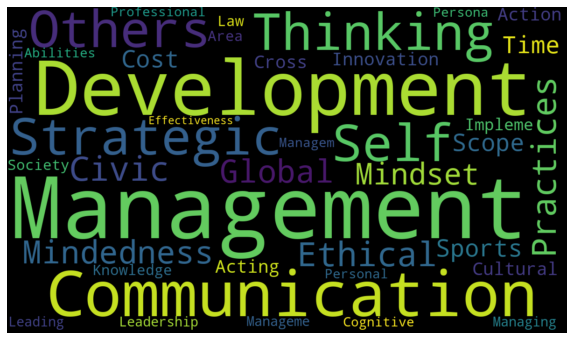

In [108]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1200, height=700, background_color="black").generate(text.to_string())

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [28]:
XN_dataset[XN_dataset.Course_Code.str.contains('LDR',case=False)]

,Program,Course_Code,Title,Description,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,Leadership,...,Agile Leadership,Kanban Principles,New Product Development,Product Management,Lean Product Development,User Experience Design (UX),Value Proposition,DevOps,Change Request,skills_sum
0,23,LDR 6100,Developing Your Leadership Capability,Begins with the premise everyone is capable of...,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,22
3,2,LDR 6101,Professional Leadership Lab/Core LDR Experience,Offers each student an opportunity to particip...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
4,2,LDR 6110,Leading Teams,Offers students an opportunity to lead teams t...,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,30
5,2,LDR 6115,Leadership Communication,Offers students an opportunity to evaluate and...,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,27
6,2,LDR 6120,Developing Organizational Leadership,Offers students an opportunity to learn the be...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,17
7,23,LDR 6135,Ethical Leadership,Considers leadership dilemmas that can arise w...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,20
8,2,LDR 6140,Strategy Development and Implementation,Offers students an opportunity to build strate...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,38
9,2,LDR 6145,Global Leadership,Explores changing demographics as they impact ...,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,8
10,2,LDR 6150,Innovation and Organizational Transformation,Offers students an opportunity to learn the fr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,23
11,3,LDR 6405,Sport in Society,Examines the role sports plays in society. Emp...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,18


In [29]:
s = XN_dataset['skills_sum']
XN_dataset.drop(['skills_sum'],axis=1,inplace=True)
XN_dataset.insert(3,'skills_sum',s)

In [30]:
df_PJM = XN_dataset[(XN_dataset['Program']==1) | (XN_dataset['Program']==12)]
df_LDR = XN_dataset[(XN_dataset['Program']==2) | (XN_dataset['Program']==12) | (XN_dataset['Program']==23)]
df_SLDR = XN_dataset[(XN_dataset['Program']==3) | (XN_dataset['Program']==23)]

In [31]:
df_LDR

,Program,Course_Code,Title,skills_sum,Description,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,...,Business Alignment,Agile Leadership,Kanban Principles,New Product Development,Product Management,Lean Product Development,User Experience Design (UX),Value Proposition,DevOps,Change Request
0,23,LDR 6100,Developing Your Leadership Capability,22,Begins with the premise everyone is capable of...,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,12,CMN 6000,Intro to Org Communication,24,Considers writing and other forms of communica...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,LDR 6101,Professional Leadership Lab/Core LDR Experience,10,Offers each student an opportunity to particip...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,LDR 6110,Leading Teams,30,Offers students an opportunity to lead teams t...,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2,LDR 6115,Leadership Communication,27,Offers students an opportunity to evaluate and...,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2,LDR 6120,Developing Organizational Leadership,17,Offers students an opportunity to learn the be...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,23,LDR 6135,Ethical Leadership,20,Considers leadership dilemmas that can arise w...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,LDR 6140,Strategy Development and Implementation,38,Offers students an opportunity to build strate...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,LDR 6145,Global Leadership,8,Explores changing demographics as they impact ...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2,LDR 6150,Innovation and Organizational Transformation,23,Offers students an opportunity to learn the fr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_SLDR

,Program,Course_Code,Title,skills_sum,Description,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,...,Business Alignment,Agile Leadership,Kanban Principles,New Product Development,Product Management,Lean Product Development,User Experience Design (UX),Value Proposition,DevOps,Change Request
0,23,LDR 6100,Developing Your Leadership Capability,22,Begins with the premise everyone is capable of...,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,CMN 6015,Introduction to Digital Era,18,"Introduces social media concepts, including th...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,23,LDR 6135,Ethical Leadership,20,Considers leadership dilemmas that can arise w...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,3,LDR 6405,Sport in Society,18,Examines the role sports plays in society. Emp...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,3,LDR 6410,Leadership/Organization in Sport,31,"Introduces a set of personal, interpersonal, a...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,3,LDR 6430,Sports Law,29,"Addresses the legal aspects of sports, recreat...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,LDR 6441,Sports Media Relations,17,Studies the basic knowledge and understanding ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,3,LDR 6443,Ticket Sales and Strategies,21,Provides an overview of ticket sales as a reve...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,3,LDR 6470,Bystander Strategies for the Prevention of Gen...,7,Offers participants an opportunity to learn ab...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,3,LDR 6961,Internship,19,"Offers students an opportunity, while under th...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_PJM

,Program,Course_Code,Title,skills_sum,Description,Team Leadership,Communications,Global Leadership,Emotional Intelligence,Servant Leadership,...,Business Alignment,Agile Leadership,Kanban Principles,New Product Development,Product Management,Lean Product Development,User Experience Design (UX),Value Proposition,DevOps,Change Request
1,12,CMN 6000,Intro to Org Communication,24,Considers writing and other forms of communica...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,1,PJM 5900,Foundations of Project Management,31,Examines the differences between general and p...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1,PJM 6000,Project Management Practices,20,Provides an overview of the project management...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,1,PJM 6005,Project Scope Management,16,"Offers insight into how projects are defined, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,1,PJM 6015,Project Risk Management,21,Examines quantitative techniques for risk asse...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,1,PJM 6025,Project Scheduling and Cost Planning,22,Builds on the project schedule to explore cost...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1,PJM 6075,Project Finance,33,Explores real-world cases of project finance a...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,1,PJM 6125,Project Evaluation and Assessment,14,Offers students an opportunity to learn to dev...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1,PJM 6135,Project Quality Management,20,Designed to provide detailed instruction in Pr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1,PJM 6140,Managing Troubled Projects,20,Examines how to prevent failed and troubled pr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
XN_dataset.to_excel('C:/Users/Chirag/Desktop/CourseSkills.xlsx')
df_PJM.to_excel('C:/Users/Chirag/Desktop/PJM.xlsx')
df_LDR.to_excel('C:/Users/Chirag/Desktop/LDR.xlsx')
df_SLDR.to_excel('C:/Users/Chirag/Desktop/SLDR.xlsx')

FileCreateError: [Errno 2] No such file or directory: 'C:/Users/Chirag/Desktop/CourseSkills.xlsx'

In [35]:
XN_dataset.sort_values(["skills_sum"], axis=0, 
                 ascending=False, inplace=True) 
XN_top5_skills = XN_dataset[["Course_Code","skills_sum"]]
XN_top5_skills.head(5)

,Course_Code,skills_sum
8,LDR 6140,38
25,PJM 6075,33
20,PJM 5900,31
12,LDR 6410,31
4,LDR 6110,30


In [36]:
XN_highest_skills = XN_dataset[["Course_Code","skills_sum"]]
xx=XN_highest_skills.head(5)


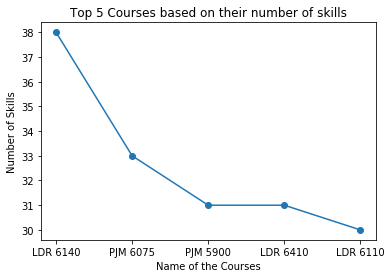

In [37]:

x = range(len(xx[["Course_Code"]]))
y = xx[["skills_sum"]]

plt.plot(x, y,marker='o')

plt.xticks(x, xx["Course_Code"])
plt.title('Top 5 Courses based on their number of skills')
plt.xlabel('Name of the Courses')
plt.ylabel('Number of Skills')
plt.show()

Text(0, 0.5, 'Number of Skills')

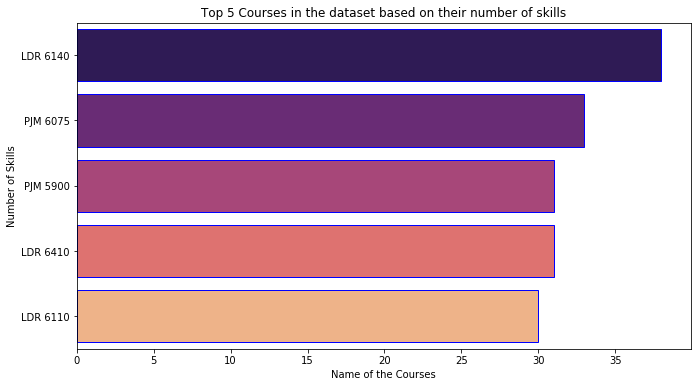

In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,6

xx0= XN_top5_skills[["Course_Code","skills_sum"]].head(5)
sns.barplot(xx0['skills_sum'],xx0['Course_Code'], edgecolor='blue', palette = 'magma')
sns.set_color_codes('pastel')
#sns.xticks(xx0['skills_sum'], xx0['Course_Code'])


#plt.barplot( 'Course_Code', 'skills_sum', data=xx0, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title('Top 5 Courses in the dataset based on their number of skills')
plt.xlabel('Name of the Courses')
plt.ylabel('Number of Skills')

Text(0, 0.5, 'Number of Skills')

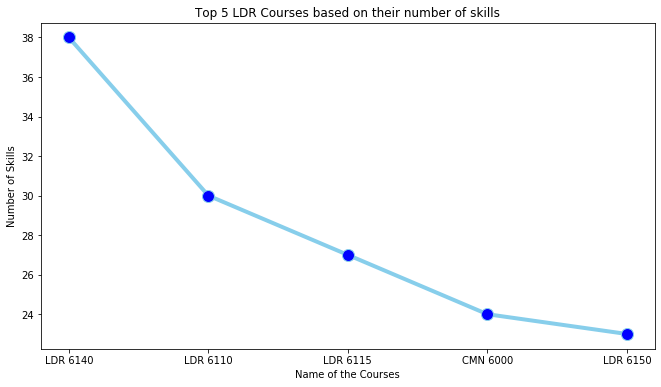

In [61]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,6
df_LDR.sort_values(["skills_sum"], axis=0, 
                 ascending=False, inplace=True) 

xx1= df_LDR[["Course_Code","skills_sum"]].head(5)
plt.plot( 'Course_Code', 'skills_sum', data=xx1, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title('Top 5 LDR Courses based on their number of skills')
plt.xlabel('Name of the Courses')
plt.ylabel('Number of Skills')

Text(0.5, 1.0, 'Top 5 SLDR Courses based on their number of skills')

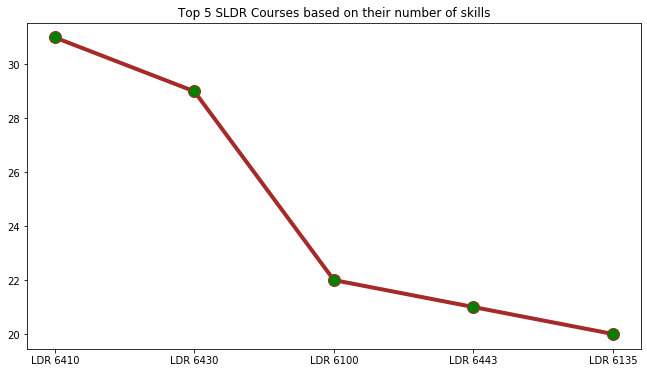

In [40]:
df_SLDR.sort_values(["skills_sum"], axis=0, 
                 ascending=False, inplace=True) 

xx2= df_SLDR[["Course_Code","skills_sum"]].head(5)
plt.plot( 'Course_Code', 'skills_sum', data=xx2, marker='o', markerfacecolor='green', markersize=12, color='brown', linewidth=4)
plt.title('Top 5 SLDR Courses based on their number of skills')


Text(0.5, 1.0, 'Top 5 PJM Courses based on their number of skills')

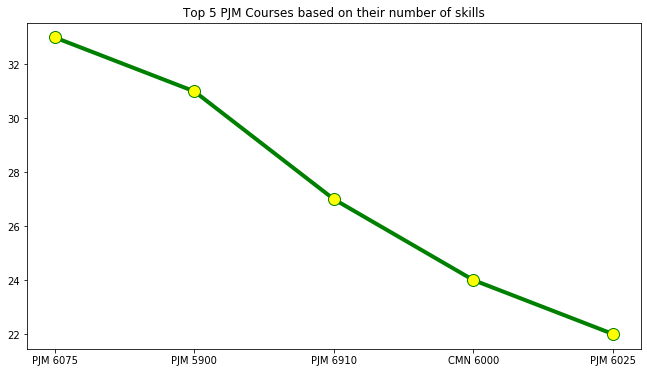

In [41]:
df_PJM.sort_values(["skills_sum"], axis=0, 
                 ascending=False, inplace=True) 

xx3= df_PJM[["Course_Code","skills_sum"]].head(5)
plt.plot( 'Course_Code', 'skills_sum', data=xx3, marker='o', markerfacecolor='yellow', markersize=12, color='green', linewidth=4)
plt.title('Top 5 PJM Courses based on their number of skills')


In [ ]:
f , axes = plt.subplots(1, 3,figsize=(16,6))
df_PJM.sort_values(["skills_sum"], axis=0, 
                 ascending=False, inplace=True) 

xx3= df_PJM[["Course_Code","skills_sum"]].head(5)
k1= sns.lineplot( 'Course_Code', 'skills_sum', data=xx3, marker='o', markerfacecolor='yellow', markersize=12, color='green', linewidth=4,ax=axes[0]).set(title = 'Top 5 PJM Courses', ylabel = 'Number of Skills' )

df_SLDR.sort_values(["skills_sum"], axis=0, 
                 ascending=False, inplace=True) 

xx2= df_SLDR[["Course_Code","skills_sum"]].head(5)
k2= sns.lineplot('Course_Code', 'skills_sum', data=xx2, marker='o', markerfacecolor='green', markersize=12, color='brown', linewidth=4,ax=axes[1]).set(title = 'Top 5 SLDR Courses', ylabel = 'Number of Skills' )


df_LDR.sort_values(["skills_sum"], axis=0, 
                 ascending=False, inplace=True) 

xx1= df_LDR[["Course_Code","skills_sum"]].head(5)
k3= sns.lineplot('Course_Code', 'skills_sum', data=xx1, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,ax=axes[2]).set(title = 'Top 5 LDR Courses', ylabel = 'Number of Skills' )


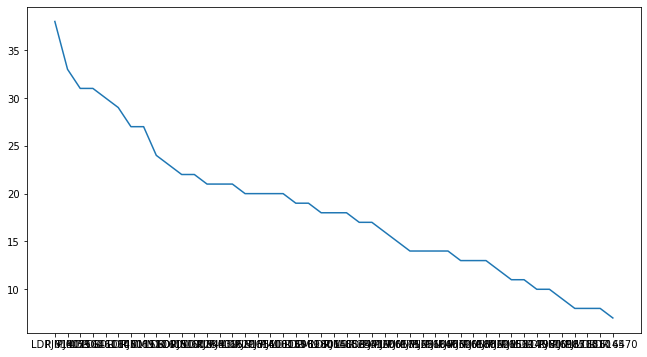

In [43]:
x = range(len(XN_dataset[["Course_Code"]]))
y = XN_dataset[["skills_sum"]]

plt.plot(x, y)

plt.xticks(x, XN_dataset["Course_Code"])

plt.show()

Text(0.5, 1.0, 'DistPlot of the primary dataset')

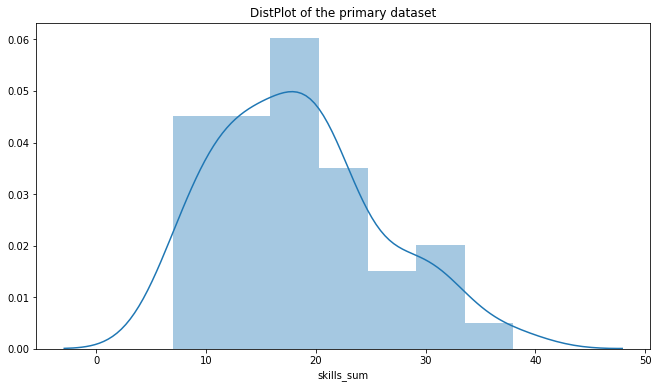

In [44]:
XN_dataset[["Course_Code","skills_sum"]]
m1= sns.distplot(XN_dataset.skills_sum,hist=True,kde=True)
plt.title('DistPlot of the primary dataset')

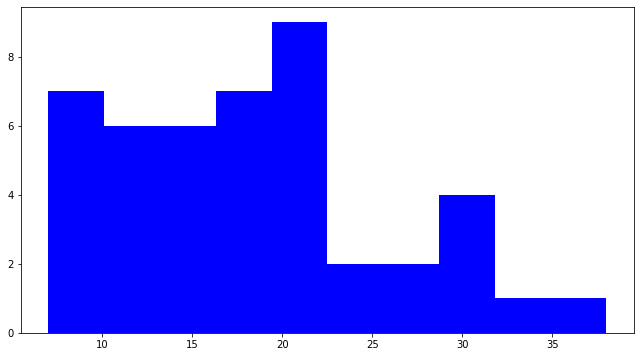

In [45]:

m2= plt.hist(XN_dataset.skills_sum,bins=10, facecolor='b')

In [47]:
#XN_dataset.nlargest(45, ['Communications'])
XN_dataset['Team Leadership'].value_counts()


0    43
1     2
Name: Team Leadership, dtype: int64

In [48]:
#Value counts for all the columns
for i in XN_dataset.iloc[:,3:-1].columns:
    x = XN_dataset.iloc[:,3:-1][i].value_counts().sort_values(ascending=False)
    print("Column name is:",i,"and it's value is:",x)


Column name is: skills_sum and it's value is: 14    4
20    4
18    3
8     3
21    3
13    3
22    2
31    2
27    2
10    2
11    2
19    2
17    2
30    1
9     1
12    1
38    1
15    1
16    1
33    1
23    1
24    1
29    1
7     1
Name: skills_sum, dtype: int64
Column name is: Description and it's value is: Offers students an opportunity to evaluate and utilize numerous communications options to develop an authentic, powerful, leadership voice using interpersonal, technology-mediated, and intercultural communications competencies and techniques; to develop a personal model for leadership communication; and to define an action plan for their growth in powerful leadership communications. In today’s dynamic, global work environment, leaders need to be able to communicate effectively with people located in the same geographical location or located anywhere across the globe.                                                                                                               

In [49]:
#Leadership 23 one's
XN_dataset['Leadership'].value_counts()

1    23
0    22
Name: Leadership, dtype: int64

In [50]:
m= df_LDR.iloc[0]
m['Course_Code']
y= df_LDR.iloc[1]
y['Course_Code']
z= df_LDR.iloc[6]
z['Course_Code']
t= (m,y,z)
t

(Program                                                                        2
 Course_Code                                                             LDR 6140
 Title                                    Strategy Development and Implementation
 skills_sum                                                                    38
 Description                    Offers students an opportunity to build strate...
                                                      ...                        
 Lean Product Development                                                       0
 User Experience Design (UX)                                                    0
 Value Proposition                                                              0
 DevOps                                                                         0
 Change Request                                                                 0
 Name: 8, Length: 413, dtype: object,
 Program                                                    

In [ ]:
plt.scatter(df_LDR['Program'],df_LDR['skills_sum'])
plt.title('Scatter plot of LDR Program')

Text(0, 0.5, 'Number of Skills')

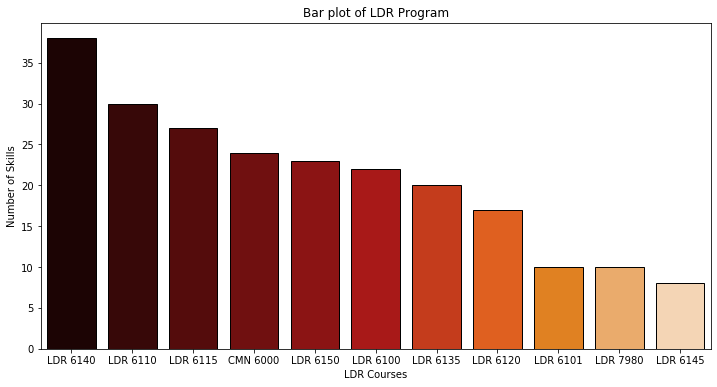

In [105]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

sns.barplot(df_LDR['Course_Code'],df_LDR['skills_sum'], edgecolor='black', palette = 'gist_heat')
sns.set_color_codes('pastel')
#sns.xticks(xx0['skills_sum'], xx0['Course_Code'])


#plt.barplot( 'Course_Code', 'skills_sum', data=xx0, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title('Bar plot of LDR Program')
plt.xlabel('LDR Courses')
plt.ylabel('Number of Skills')

Text(0, 0.5, 'Number of Skills')

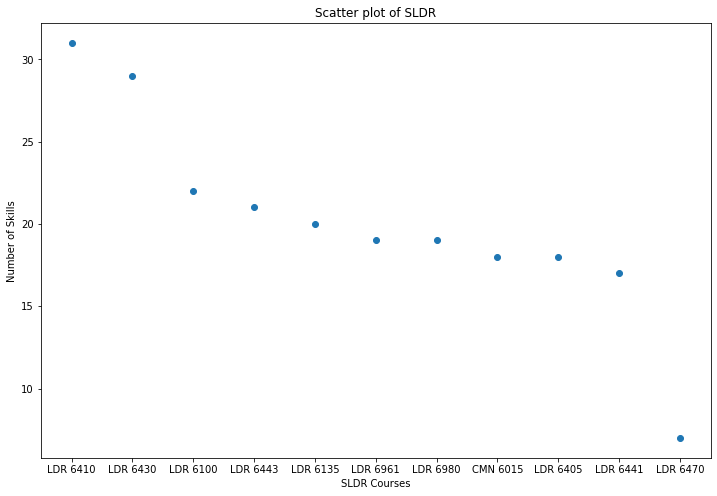

In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
plt.scatter(df_SLDR['Course_Code'],df_SLDR['skills_sum'])
plt.title('Scatter plot of SLDR')
plt.xlabel('SLDR Courses',)
plt.ylabel('Number of Skills')


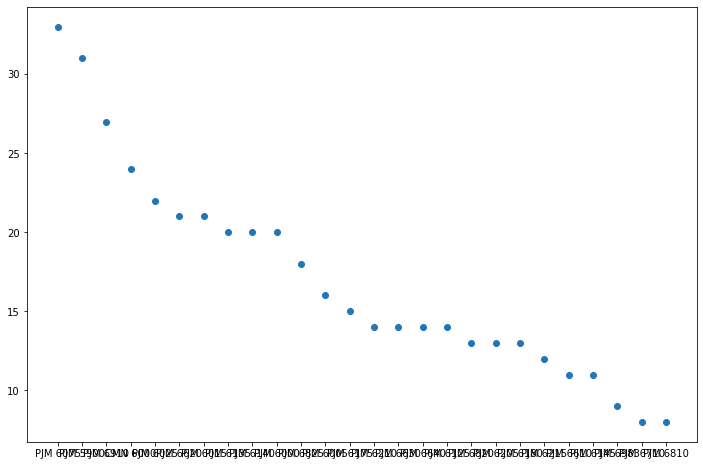

In [54]:

plt.scatter(df_PJM['Course_Code'],df_PJM['skills_sum'])

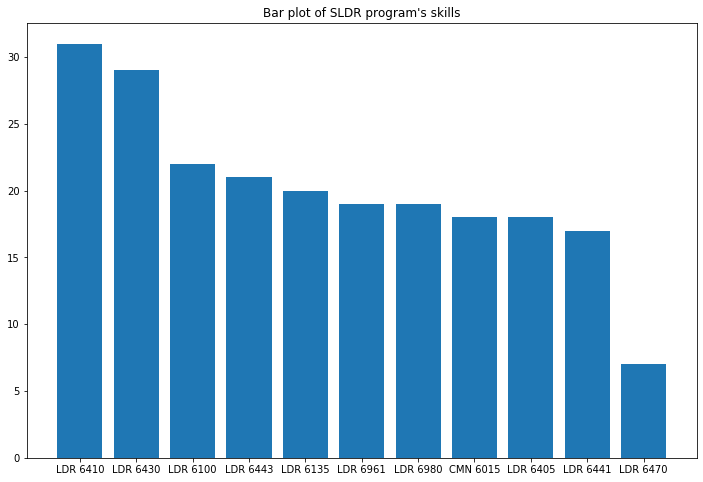

In [55]:
plt.bar(df_SLDR['Course_Code'],df_SLDR['skills_sum'])
plt.title("Bar plot of SLDR program's skills")
from pylab import rcParams
rcParams['figure.figsize'] = 9,12


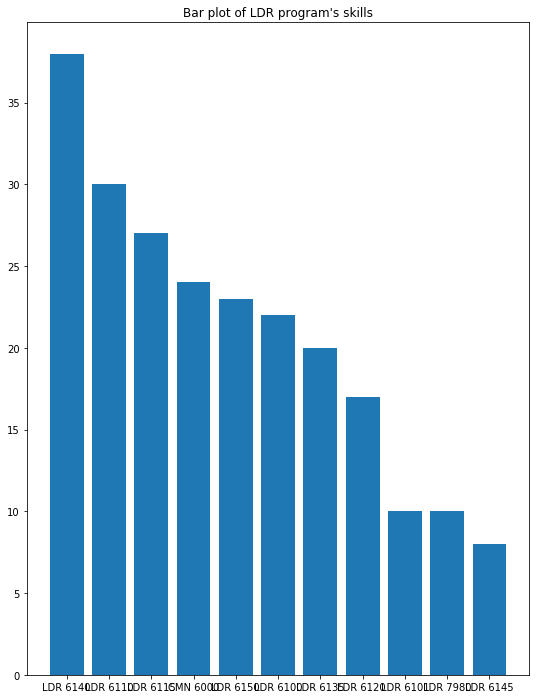

In [56]:
plt.bar(df_LDR['Course_Code'],df_LDR['skills_sum'])
plt.title("Bar plot of LDR program's skills")
from pylab import rcParams
rcParams['figure.figsize'] = 9,12

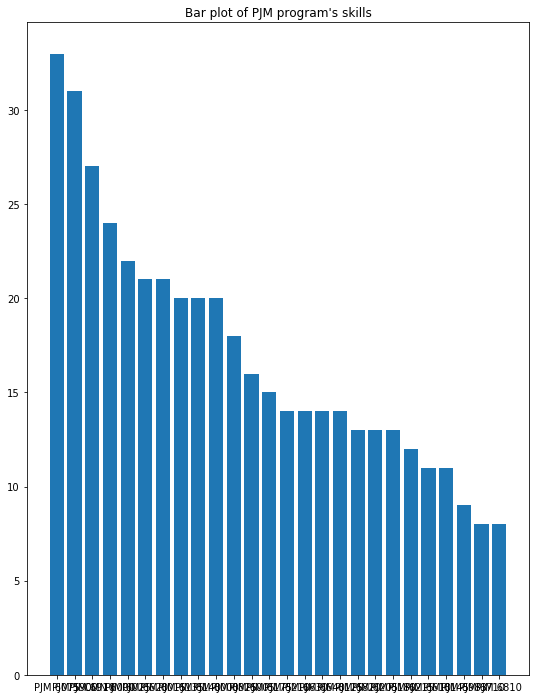

In [57]:
plt.bar(df_PJM['Course_Code'],df_PJM['skills_sum'])
plt.title("Bar plot of PJM program's skills")
from pylab import rcParams
rcParams['figure.figsize'] = 9,12

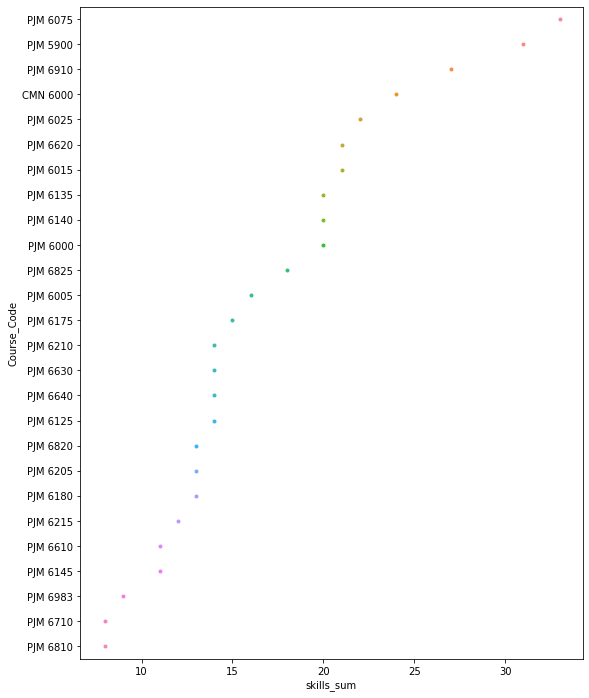

In [58]:
#sns.swarmplot(XN_dataset["skills_sum"])
#sns.boxplot(x="skills_sum", y="Course_Code", data=df_PJM, whis=3.0);
sns.swarmplot(x="skills_sum", y="Course_Code", data=df_PJM, size=4);